# Helicopter Escapes!

![Prison Break](https://miro.medium.com/max/720/1*sDzSWwNI9_u95-1kaON_-g.webp)

We'll work with a dataset of helicopter prison escapes from [Wikipedia](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes).

And we'll try to answer the following questions:

   - In which year did the most helicopter prison break attempts occur?
   - In which countries do the most attempted helicopter prison breaks occur?
   - In which countries do helicopter prison breaks have a higher chance of success?
   - How does the number of escapees affect the success?
   - Which escapees have done it more than once?

In [1]:
# Import all nessesary libraries

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 Download data

Download dataset from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [2]:
# read URL
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = pd.read_html(url, match='Prison name')

# convert list to DataFrame
data = data[0]

# Print first row of Dataframe
print(data.iloc[0])

Date                                             August 19, 1971
Prison name                                Santa Martha Acatitla
Country                                                   Mexico
Succeeded                                                    Yes
Escapee(s)     Joel David Kaplan Carlos Antonio Contreras Castro
Details        Joel David Kaplan was a New York businessman w...
Name: 0, dtype: object


### Step 2 Inspect and clean data

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         48 non-null     object
 1   Prison name  48 non-null     object
 2   Country      48 non-null     object
 3   Succeeded    48 non-null     object
 4   Escapee(s)   48 non-null     object
 5   Details      48 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


,Date,Prison name,Country,Succeeded,Escapee(s),Details
count,48,48,48,48,48,48
unique,48,45,15,2,40,48
top,"August 19, 1971",Luynes prison,France,Yes,—,Joel David Kaplan was a New York businessman w...
freq,1,2,15,34,7,1


We have no missing data, but
 - we have irrevelant column "Details"
 - from "Date" column we need only year  

In [4]:
# drop extra column 
data.drop(['Details'], axis=1, inplace=True)
print(data.keys())

Index(['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)'], dtype='object')


In [5]:
# Now we will use Regular Expressions to find four digits (year of escape) in first row, and replace "Date" in Dataframe
index = 0

for row in data['Date']:
    row = int(re.search("\d{4}", row)[0])
    data['Date'].values[index] = row
    index = index + 1
    
print(data.iloc[0])

Date                                                        1971
Prison name                                Santa Martha Acatitla
Country                                                   Mexico
Succeeded                                                    Yes
Escapee(s)     Joel David Kaplan Carlos Antonio Contreras Castro
Name: 0, dtype: object


### Step 3 Answer the questions

#### In which year did the most attempts at breaking out of prison with a helicopter occur?

In [6]:
# Define time period of dataset
min_year = data.min(axis=0)['Date']
max_year = data.max(axis=0)['Date']

# List of all years in a period
years = []
for y in range(min_year, max_year + 1):
    years.append(y)

# Calculation of #attemps per year    
attemps_per_year = []
attemp = 0

for year in years:
    for row in data['Date']:
        if year == row:
            attemp += 1
    attemps_list = (year, attemp)
    attemps_per_year.append(attemps_list)
    attemp = 0
    
att = pd.DataFrame(attemps_per_year, columns =['Year', 'Attemps'])
print(att.head(5))

   Year  Attemps
0  1971        1
1  1972        0
2  1973        1
3  1974        0
4  1975        0


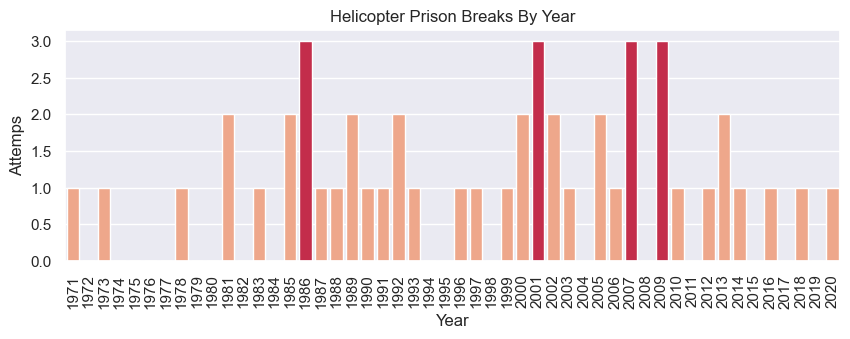

In [7]:
# Result visualization
# Function that create a list of the matplotlib colors corresponding to attemps value

def custom_palette(series, max_color = 'crimson', other_color = 'lightsalmon'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

palette = custom_palette(att["Attemps"])

# Build of seaborn plot
sns.set(rc={"figure.figsize":(10, 3)}) #width=10, height=3
sns.barplot(data=att, x="Year", y="Attemps", palette=palette)
plt.title('Helicopter Prison Breaks By Year')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.show()

#### The most attemps of preason breaking with a helicopter occured in 1986, 2001, 2007 and 2009.

#### In which countries do the most attempted helicopter prison breaks occur?

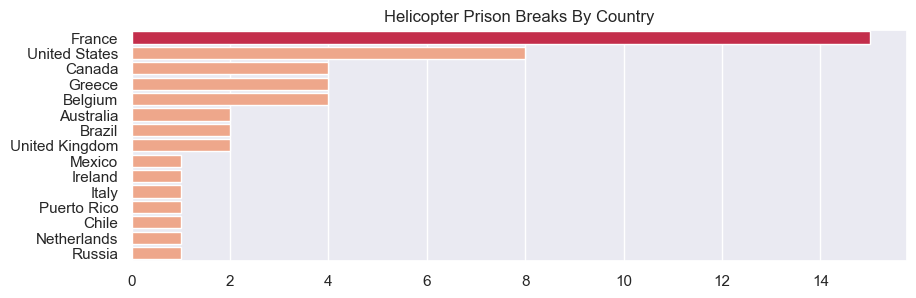

In [8]:
#Calculate number of attemps by country
countries_frequency = data["Country"].value_counts()

#Plot results
palette = custom_palette(countries_frequency)
sns.barplot(x=countries_frequency.values, y=countries_frequency.index, palette=palette)
plt.title('Helicopter Prison Breaks By Country')

plt.show()

#### The most attempts of preason breaking with a helicopter occured in France (15 attempts), followed by USA (8 attempts).

#### In which countries do helicopter prison breaks have a higher chance of success?

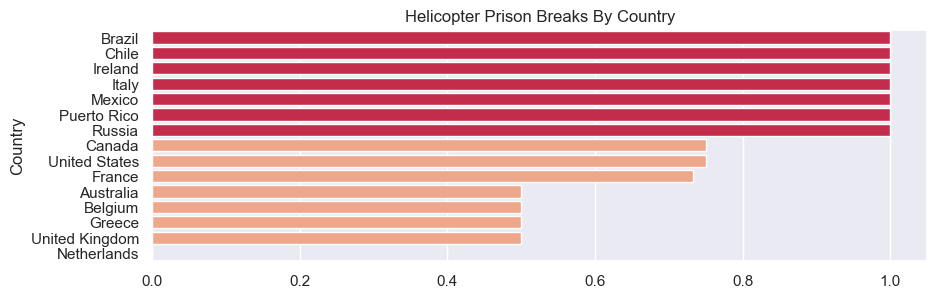

In [9]:
# convert the success of attemption value in column to boolean
data['SuccessRate'] = data.apply(lambda row: 1 if row['Succeeded'] == 'Yes' else 0, axis=1)

# calculate the success rate
country_success = data.groupby('Country')['SuccessRate'].mean()

# visualise results
country_success.sort_values(ascending=False, inplace=True)
palette = custom_palette(country_success)
sns.barplot(x=country_success.values, y=country_success.index, palette=palette)
plt.title('Helicopter Prison Breaks By Country')

plt.show()

#### 100% success rate of  helicopter prison breaks was in Brazil, Chile, Ireland, Italy, Mexico, Puerto Rico, and Russia.

#### How does the number of escapees affect the success?

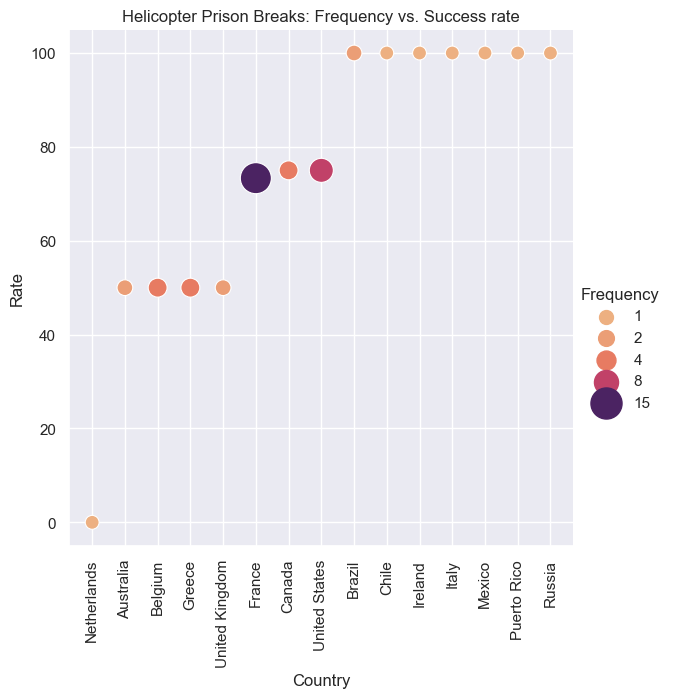

In [10]:
# build dataframe with success rate vs frequency by contry
success_vs_frequency = []

for indx, value in country_success.items():
    for indx_fr, value_fr in countries_frequency.items():
        if indx == indx_fr:
            success_vs_frequency.append([indx, value*100, value_fr])
            
success_vs_frequency = pd.DataFrame(success_vs_frequency, columns=['Country','Rate','Frequency'])
success_vs_frequency.sort_values(by=['Rate'], inplace=True)

# Plot Success rate per country against frequency
sns.relplot(x="Country", y="Rate", hue="Frequency", size="Frequency", sizes=(100, 500), 
           height=6, palette="flare", data=success_vs_frequency)

plt.title('Helicopter Prison Breaks: Frequency vs. Success rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.show()

#### Chile, Ireland, Italy, Mexico, Puerto Rico, and Russia have 100% success rate but only 1 attemp, so it is statistically "weak" data (as Brazil with 2 attemps). When we analyze both Success rate and Frequency, we see that best chance to escape are in France, followed by United States.

#### Which escapees have done it more than once?

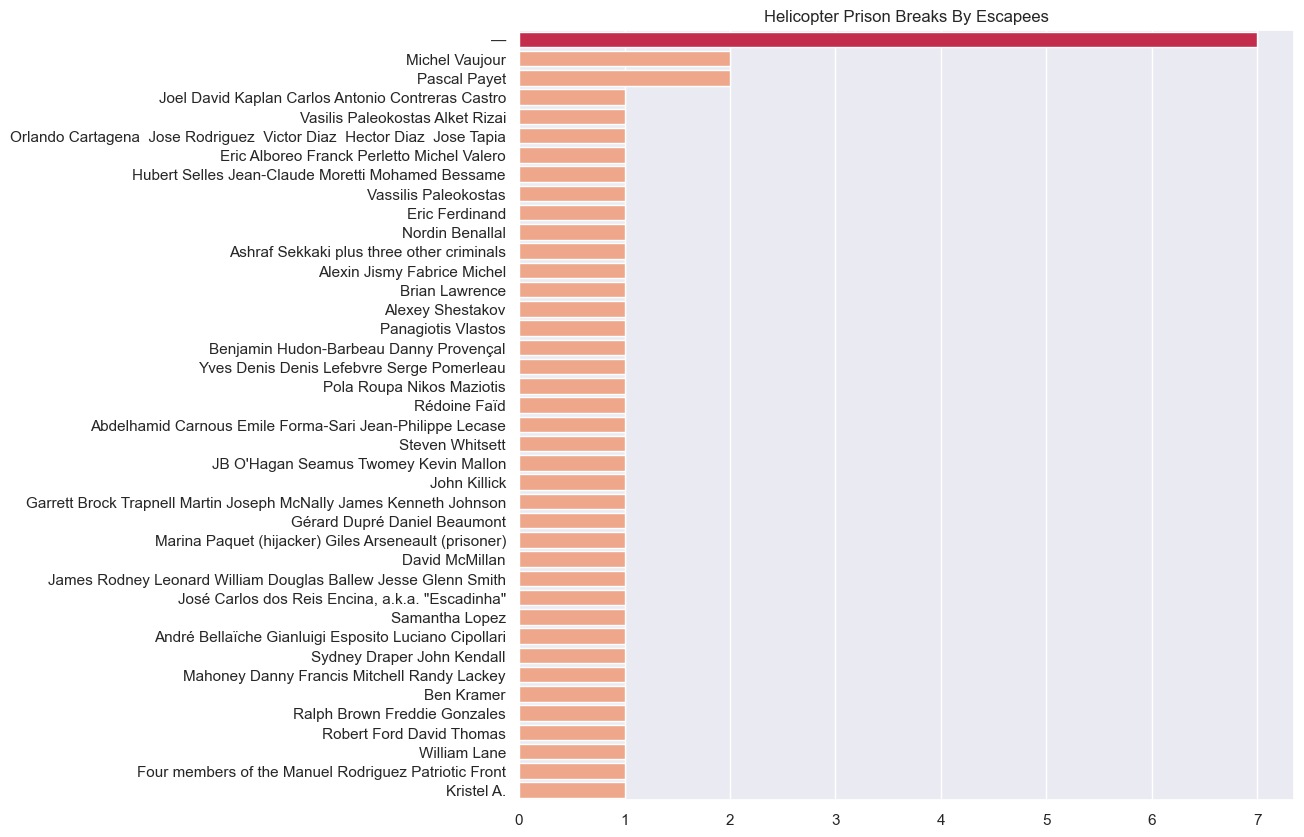

In [11]:
#Calculate number of attemps by escapees
escapees_frequency = data["Escapee(s)"].value_counts()

#Plot results
sns.set(rc={"figure.figsize":(10, 10)}) #width=10, height=3
palette = custom_palette(escapees_frequency)
sns.barplot(x=escapees_frequency.values, y=escapees_frequency.index, palette=palette, )
plt.title('Helicopter Prison Breaks By Escapees')

plt.show()

#### So "Noname" won the Prize! 
#### Actually Michel Vaujour and Pascal Payet take the 1st place with 2 attemps.